In [1]:
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt

In [2]:
def show_images(inp_img, out_img):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def save_image(img):
   cv2.imwrite('../data/out_images/polygon2_result.png', img)

In [3]:
def create_low_poly_effect(img, num_points=1000):
    height, width = img.shape[:2]
    
    # Create points
    points = []
    
    # Add corner points
    points.append([0, 0])
    points.append([width-1, 0])
    points.append([width-1, height-1])
    points.append([0, height-1])
    
    # Add edge points
    num_edge_points = num_points // 4
    for _ in range(num_edge_points):
        points.append([0, random.randint(0, height-1)])
        points.append([width-1, random.randint(0, height-1)])
        points.append([random.randint(0, width-1), 0])
        points.append([random.randint(0, width-1), height-1])
    
    # Add random points based on edges in the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    
    for _ in range(num_points):
        y, x = np.where(edges > 0)
        if len(x) > 0:
            idx = random.randint(0, len(x) - 1)
            points.append([x[idx], y[idx]])
        else:
            points.append([random.randint(0, width-1), random.randint(0, height-1)])
    
    # Convert points to numpy array
    points = np.array(points)
    
    # Create subdivisions
    rect = (0, 0, width, height)
    subdiv = cv2.Subdiv2D(rect)
    
    for point in points:
        try:
            subdiv.insert((int(point[0]), int(point[1])))
        except:
            continue
    
    # Get triangles
    triangles = subdiv.getTriangleList()
    
    # Create output image
    output = np.zeros_like(img)
    
    # Draw triangles
    for t in triangles:
        pt1 = (int(t[0]), int(t[1]))
        pt2 = (int(t[2]), int(t[3]))
        pt3 = (int(t[4]), int(t[5]))
        
        # Calculate center point
        center_x = int((t[0] + t[2] + t[4]) // 3)
        center_y = int((t[1] + t[3] + t[5]) // 3)
        
        # Make sure point is within image bounds
        if (0 <= center_x < width and 0 <= center_y < height):
            # Get color at center point
            color = img[center_y, center_x].tolist()
            
            # Draw filled triangle
            triangle = np.array([pt1, pt2, pt3], dtype=np.int32)
            cv2.fillPoly(output, [triangle], color)
    
    # Add slight blur to smooth edges
    output = cv2.GaussianBlur(output, (3, 3), 0)
    
    return output

In [4]:
image = cv2.imread('../data/inp_images/tower.jpeg')
result = create_low_poly_effect(image)

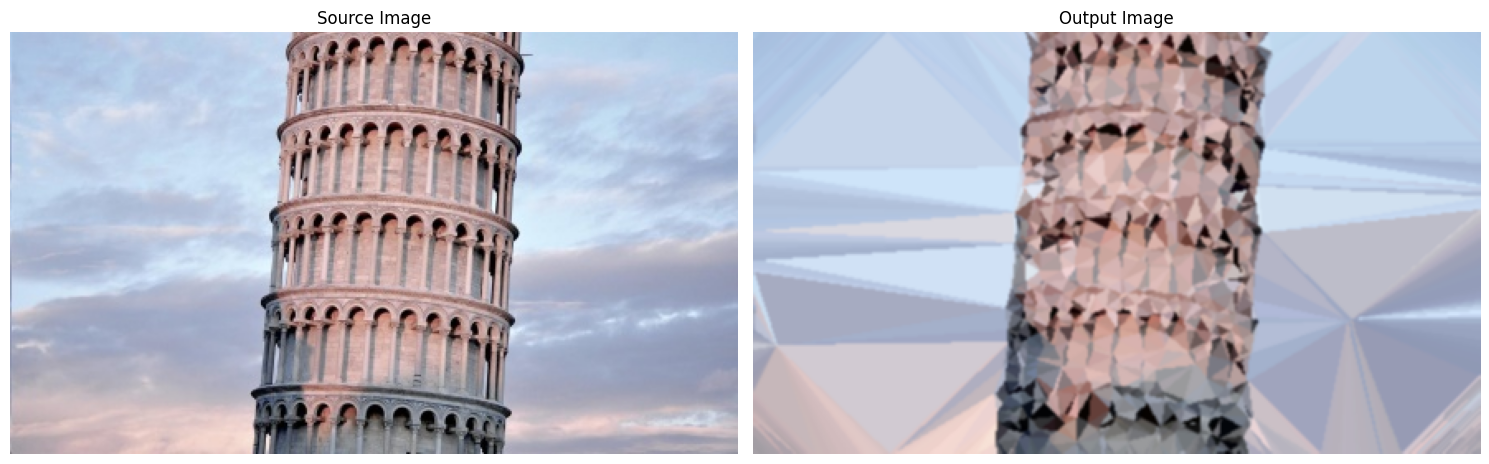

In [5]:
show_images(image, result)
save_image(result)